In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

<h1 style="text-align:center; font-size: 5rem">Curve Fitting</h1>

!["a"](17.4.png)

#### given a set of $n$ points $X$ and $Y$ we can form the linear fit line using:
$$a_1=\frac{n\sum{xy}-\sum{y}\sum{y}}{n\sum{x^2}-(\sum{x})^2}$$

$$a_0 = \frac{\sum{y} -a1\sum{x}}{n}$$



## A)

In [98]:
"""
Using Pandas dataframes, Set a dataframe "df" to hold:
X: x values
Y: y values
XY: x*y values
Y2: Squre of y values
X2: Squre of x values
"""

#setup initial data dictionary 
data = {"X":[6,7,11,15,17,21,23,29,29,37,39],"Y":[29,21,29,14,21,15,7,7,13,0,3]}

#turn the data to pandas df
df = pd.DataFrame(data)

#calculate other columns using numpy
X = df["X"].to_numpy()
Y = df["Y"].to_numpy()
XY = np.multiply(X,Y)
X2 = np.multiply(X,X)
Y2 = np.multiply(Y,Y)

#add the calculated columns to df
df["XY"]= XY
df["X2"]=X2
df["Y2"]=Y2

In [99]:
#function to calculate STD 
def std_calc(x,y):
    return (y-a0-(a1*x))**2

#dataframe "Sums" that hold summation of columns from df
Sums = pd.DataFrame({"X":[df["X"].sum()],
                     "Y":[df["Y"].sum()],
                     "XY":[df["XY"].sum()],
                     "X2":[df["X2"].sum()],
                     "Y2":[df["Y2"].sum()]
                    })

#get n and calculate a1,a0 using the formulas
n=df.shape[0]
a1 = (n*Sums["XY"]-Sums["Y"]*Sums["X"])/(n*Sums["X2"]-Sums["X"]**2)
a0 = (Sums["Y"]-a1*Sums["X"])/(n)

#calculate squared error for y (SE_y)
df["SE_y"] = df["Y"].apply(lambda y: (y-df["Y"].mean())**2)
df["std_div"] = df.apply(lambda d: std_calc(d['X'], d['Y']), axis=1)

#calculate f(x) evaluation for every x point for ploting
df['f(x)'] = df['X'].apply(lambda x: a1*x+a0)

#calculation of measurements
St  = df["SE_y"].sum()
Sr  = df["std_div"].sum()
Syx = np.sqrt(Sr/(n-2))
r   = np.sqrt((St-Sr)/St)
display(df)

,X,Y,XY,X2,Y2,SE_y,std_div,f(x)
0,6,29,174,36,841,211.570248,6.887373,26.375619
1,7,21,147,49,441,42.842975,21.114695,25.595073
2,11,29,319,121,841,211.570248,42.603206,22.472887
3,15,14,210,225,196,0.206612,28.629999,19.350701
4,17,21,357,289,441,42.842975,10.306618,17.789608
5,21,15,315,441,225,0.297521,0.110608,14.667422
6,23,7,161,529,49,55.570248,37.287251,13.106329
7,29,7,203,841,49,55.570248,2.025070,8.423050
8,29,13,377,841,169,2.115702,20.948474,8.423050
9,37,0,0,1369,0,208.933884,4.746636,2.178678


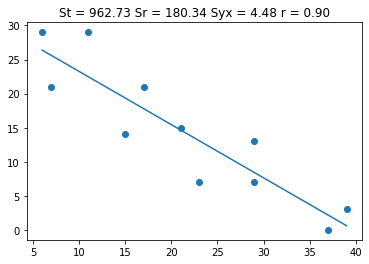

In [100]:
#plotting
# (x,y) scatter plot
plt.scatter(df["X"],df["Y"])
# regression line plotting
plt.plot(df["X"],df["f(x)"])
# title with measurements, the ";" supresses unwanted output
plt.title(f"St = {St:0.2f} Sr = {Sr:0.2f} Syx = {Syx:0.2f} r = {r:0.2f}");


## B)

Taking the measured values $x=10$ and $y=10$ we see that when x is subbed in $ y = a1x+a0$ that we get $y=23.253$.

Taking the absolute value difference between $y_{calculated}$ and $y_{measured}$ we get $|\Delta_y| =13.253$.

$|\Delta_y|$ is greater that the Standard deviation, which we got to be $S_{x/y}=4.48$, by approximately 2.9x **Therefore the measurement is likely to be wrong**.

!["a"](17.9.png)

#### Starting with:
$$y = \alpha_0e^{(\alpha_1x)}$$


#### Take natural log of both side:
$$\ln{y} = \ln{\alpha_0}+\alpha_1x$$

#### Taking $$ z = \ln{y}, a_0 = \ln{\alpha_0},  a_1 = \alpha_1$$
#### we get
$$z=xa_1+a_0$$
 using the same euqation for linear fit to find $a_0,a_1$ then calculate $\alpha_0,\alpha_1$

In [101]:
"""
Using Pandas dataframes, Set a dataframe "df" to hold:
X: x values
Y: y values
Z: natural log of y values
XZ: x*z values
X2: Squre of x values
"""

#setup initial data dictionary 
data = {"X":[0.4,0.8,1.2,1.6,2,2.3],"Y":[800,975,1500,1950,2900,3600]}

#turn the data to pandas df
df = pd.DataFrame(data)

#calculate other columns using numpy
X = df["X"].to_numpy()
Y = df["Y"].to_numpy()
df["Z"]= np.log(Y)
df["XZ"] = np.multiply(X,df["Z"])
df["X2"] = np.multiply(X,X)

#dataframe "Sums" that hold summation of columns from df
Sums = pd.DataFrame({"X":[df["X"].sum()],
                     "Y":[df["Y"].sum()],
                     "Z":[df["Z"].sum()],
                     "XZ":[df["XZ"].sum()],
                     "X2":[df["X2"].sum()]
                    })

#calcualte linear constants
n=df.shape[0]
a1 = (n*Sums["XZ"]-Sums["Z"]*Sums["X"])/(n*Sums["X2"]-Sums["X"]**2)
a0 = (Sums["Z"]-a1*Sums["X"])/(n)

#find the exponential constants
alph0 = np.exp(a0)
alph1 = a1

#calculate f(x) evaluation for every x point for ploting
df['f(x)'] = df['X'].apply(lambda x :alph0 *np.exp(x*alph1))

#display the df table
display(df)

,X,Y,Z,XZ,X2,f(x)
0,0.4,800,6.684612,2.673845,0.16,758.362261
1,0.8,975,6.882437,5.505950,0.64,1052.182313
2,1.2,1500,7.313220,8.775864,1.44,1459.840075
3,1.6,1950,7.575585,12.120935,2.56,2025.440856
4,2.0,2900,7.972466,15.944932,4.00,2810.178136
5,2.3,3600,8.188689,18.833985,5.29,3592.481694


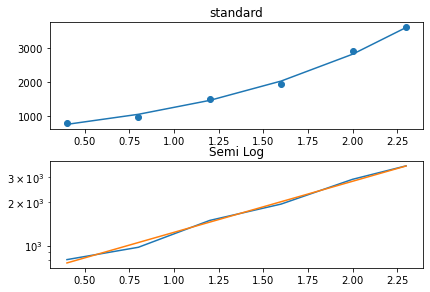

In [102]:
# Plotting
# init 2 plots
fig, (ax1, ax2) = plt.subplots(2)
fig.tight_layout()
# (x,y) scatter plot
ax1.scatter(df["X"],df["Y"])
ax2.semilogy(df["X"],df["Y"])
ax1.title.set_text("standard")

# regression line plotting
ax1.plot(df["X"],df["f(x)"])
ax2.semilogy(df["X"],df["f(x)"]);
ax2.title.set_text("Semi Log")

!["a"](17.14.png)

#### Take square root of both side:
$$\sqrt(y) = \frac{a+\sqrt(x)}{b\sqrt(x)}$$

#### Split the RHD fraction and simplify :
$$\frac{a+\sqrt(x)}{b\sqrt(x)} = \frac{a}{b\sqrt(x)} + \frac{\sqrt(x)}{b\sqrt(x)} = \frac{a}{b}\frac{1}{\sqrt(x)}+\frac{1}{b}$$

#### Putting all together:
$$\sqrt(y) = \frac{a}{b}\frac{1}{\sqrt(x)}+\frac{1}{b}$$

#### Taking $$z = \sqrt(y), w = \frac{1}{\sqrt(x)}, a_0 = \frac{1}{b}, a_1 = \frac{a}{b}$$
#### we get
$$z=wa_1+a_0$$

,X,Y,Z,W,WZ,W2,f(x),f2(x)
0,0.5,10.4,3.224903,1.414214,4.560702,2.000000,3.227079,10.414040
1,1.0,5.8,2.408319,1.000000,2.408319,1.000000,2.401914,5.769189
2,2.0,3.3,1.816590,0.707107,1.284523,0.500000,1.818433,3.306700
3,3.0,2.4,1.549193,0.577350,0.894427,0.333333,1.559942,2.433419
4,4.0,2.0,1.414214,0.500000,0.707107,0.250000,1.405851,1.976416


the prediction of x = 1.6 is: 
f(1.6) = 3.9390


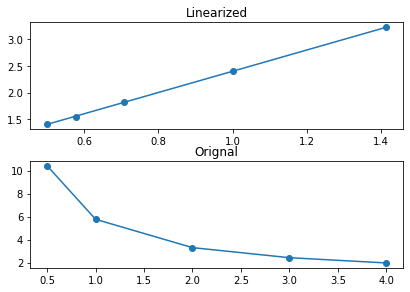

In [103]:
"""
Using Pandas dataframes, Set a dataframe "df" to hold:
X: x values
Y: y values
Z: sqrt(y) values
W: 1/sqrt(x) values
WZ: w*z values
W2: Squre of w values
"""

#setup initial data dictionary 
data = {"X":[0.5,1,2,3,4],"Y":[10.4,5.8,3.3,2.4,2]}

#turn the data to pandas df
df = pd.DataFrame(data)

#calculate other columns using numpy
X = df["X"].to_numpy()
Y = df["Y"].to_numpy()
df["Z"]  = np.sqrt(Y)
df["W"]  = df["X"].apply(lambda x: 1/np.sqrt(x))
df["WZ"] = np.multiply(df["W"],df["Z"])
df["W2"] = np.multiply(df["W"],df["W"])

#dataframe "Sums" that hold summation of columns from df
Sums = pd.DataFrame({"X":[df["X"].sum()],
                     "Y":[df["Y"].sum()],
                     "Z":[df["Z"].sum()],
                     "W":[df["W"].sum()],
                     "WZ":[df["WZ"].sum()],
                     "W2":[df["W2"].sum()]
                    })
#calculate linear constants
n=df.shape[0]
a1 = (n*Sums["WZ"]-Sums["Z"]*Sums["W"])/(n*Sums["W2"]-Sums["W"]**2)
a0 = (Sums["Z"]-a1*Sums["W"])/(n)

#calculate f(x) evaluation for every x point for ploting
df['f(x)'] = df['W'].apply(lambda x: a1*x+a0)

#calculate a and b
b = 1/a0
a = a1*b

#calculate f(x) evaluation for every x point for ploting
df['f2(x)'] = df['X'].apply(lambda x: ((a+np.sqrt(x))/(b*np.sqrt(x)))**2)

# init 2 plots
fig, (ax1, ax2) = plt.subplots(2)
fig.tight_layout()

#Linear plot
# (x,y) scatter plot
ax1.scatter(df["W"],df["Z"])
# regression line plotting
ax1.plot(df["W"],df["f(x)"])
ax1.title.set_text("Linearized")

#orignal plot
# (x,y) scatter plot
ax2.scatter(df["X"],df["Y"])
# regression line plotting
ax2.plot(df["X"],df["f2(x)"])
ax2.title.set_text("Orignal")
display(df)
#find the prediction of x = 1.6
pred = lambda x:((a+np.sqrt(x))/(b*np.sqrt(x)))**2
print(f"the prediction of x = 1.6 is: \nf(1.6) = {float(pred(1.6)):.4f}")

<h1 style="text-align:center; font-size: 5rem">Interpolation</h1>

In [104]:
#method to calcualte the fdd table
def fdd_table(X, Y):
    n = len(X)
    fdd_table= [[None for x in range(n)] for x in range(n)]
    
    #set initial column with given data 
    for i in range(n):
        fdd_table[i][0]=Y[i]
    # calculate the fdd table
    for i in range(1,n):
        for j in range(n-i):
            fdd_table[j][i]=(fdd_table[j+1][i-1]-fdd_table[j][i-1])/(X[i+j]-X[j])
    
    #return fdd table as dataframe
    return pd.DataFrame(fdd_table)

def Newt_interpolate(X,Y,x_new,coeff):
    #initial values for the computational loop
    n = len(X)
    xterm = 1
    error = [None for _ in range(n)]
    iteration_res = [None for _ in range(n)]
    iteration_res[0] = coeff[0]
    
    #loop for newtown polynomial in order
    for i in range(1,n):
        xterm = xterm*(x_new - X[i-1])
        iteration_res[i] = iteration_res[i-1]+coeff[i]*xterm
        # error is the diffrance between the previous and current iteration
        error[i-1]=abs(iteration_res[i]-iteration_res[i-1])
    return (iteration_res[-1],pd.DataFrame({"Y":iteration_res,"Error":error}))

!["a"](18.5.png)

In [105]:
#set up the data and point x given
X=[1.6,2,2.5,3.2,4,4.5]
Y=[2,8,14,15,8,2]
x_given = 2.8

#find out the fdd table and get the first row since it is contains the coeff of the newton polynomial
fdd = fdd_table(X,Y)
coeff = fdd[:1].values[0]

#get the final y interpolated and data frame containing y interpolated and the error for each order
y_interp,error = Newt_interpolate(X,Y,x_given,coeff)
#display the fdd and y interpolated and the error for each order
display(fdd)
display(error)

,0,1,2,3,4,5
0,2,15.000000,-3.333333,-3.422619,1.847718,-0.481151
1,8,12.000000,-8.809524,1.011905,0.452381,NaN
2,14,1.428571,-6.785714,2.142857,NaN,NaN
3,15,-8.750000,-2.500000,NaN,NaN,NaN
4,8,-12.000000,NaN,NaN,NaN,NaN
5,2,NaN,NaN,NaN,NaN,NaN


,Y,Error
0,2.000000,18.000000
1,20.000000,3.200000
2,16.800000,0.985714
3,15.814286,0.212857
4,15.601429,0.066514
5,15.534914,NaN


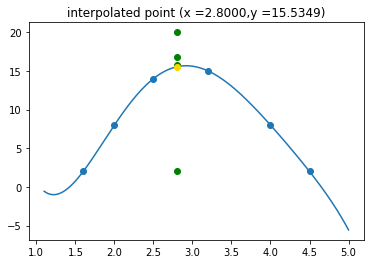

In [106]:
#plotting
plt.scatter(X,Y)

#plot all (x,y) where x is x given and y in set of y interpolated by Newtow polynomials
#for each order except the last one in green
plt.scatter([x_given]*(len(X)-2),error["Y"].values[:-2],color="green")

#plot all (x,y) where x is x given and y in set of y interpolated by Newtow polynomial
#of the highest order in gold and set it over every other plotted object for clarity
plt.scatter(x_given,y_interp,color="gold",zorder=3)

# sample a set of points (p,q) to plot the interpolated curve to graphicaly see it fit
p = np.linspace(min(X)-.5, max(X)+.5, 1000)
q = [Newt_interpolate(X,Y,i,coeff)[0] for i in p]

plt.title(f"interpolated point (x ={x_given:0.4f},y ={y_interp:0.4f})")
plt.plot(p,q);

!["a"](18.9.png)

In [107]:
#set up the data and point x given
X=[0,1,2.5,3,4.5,5,6]
Y=[2,5.4375,7.3516,7.5625,8.4453,9.1875,12]
x_given = 3.5

#find out the fdd table and get the first row since it is contains the coeff of the newton polynomial
fdd = fdd_table(X,Y)
coeff = fdd[:1].values[0]

y_interp,error = Newt_interpolate(X,Y,x_given,coeff)

display(fdd)
display(error)

,0,1,2,3,4,5,6
0,2.0000,3.437500,-0.864573,0.145813,0.000010,-0.000003,7.901235e-07
1,5.4375,1.276067,-0.427133,0.145857,-0.000008,0.000001,NaN
2,7.3516,0.421800,0.083367,0.145827,-0.000001,NaN,NaN
3,7.5625,0.588533,0.447933,0.145822,NaN,NaN,NaN
4,8.4453,1.484400,0.885400,NaN,NaN,NaN,NaN
5,9.1875,2.812500,NaN,NaN,NaN,NaN,NaN
6,12.0000,NaN,NaN,NaN,NaN,NaN,NaN


,Y,Error
0,2.000000,12.031250
1,14.031250,7.565017
2,6.466233,1.275867
3,7.742100,0.000043
4,7.742143,0.000015
5,7.742158,0.000005
6,7.742163,NaN


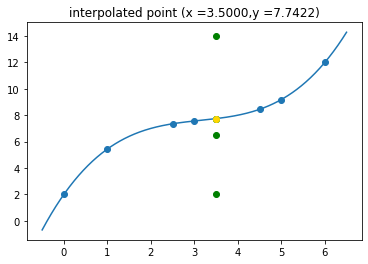

In [108]:
#plotting
plt.scatter(X,Y)

#plot all (x,y) where x is x given and y in set of y interpolated by Newtow polynomials
#for each order except the last one in green
plt.scatter([x_given]*(len(X)-2),error["Y"].values[:-2],color="green")

#plot all (x,y) where x is x given and y in set of y interpolated by Newtow polynomial
#of the highest order in gold and set it over every other plotted object for clarity
plt.scatter(x_given,y_interp,color="gold",zorder=3)

# sample a set of points (p,q) to plot the interpolated curve to graphicaly see it fit
p = np.linspace(min(X)-.5, max(X)+.5, 1000)
q = [Newt_interpolate(X,Y,i,coeff)[0] for i in p]

plt.title(f"interpolated point (x ={x_given:0.4f},y ={y_interp:0.4f})")
plt.plot(p,q);
